# Week8 - Homework KNN-NB-SVM

- Use GridSearchCV on X_train dataset
    - KNN, NB, SVM, Logistic Regression, Decision Trees
- Test on X_test dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [2]:
X_train = pd.read_csv('https://github.com/msaricaumbc/DS_data/raw/master/ds602/movie/X_train.csv')
y_train = pd.read_csv('https://github.com/msaricaumbc/DS_data/raw/master/ds602/movie/y_train.csv')

In [3]:
print(X_train.head())

                                              review
0  Shame, is a Swedish film in Swedish with Engli...
1  I know it's rather unfair to comment on a movi...
2  "Bread" very sharply skewers the conventions o...
3  After reading tons of good reviews about this ...
4  During the Civil war a wounded union soldier h...


In [4]:
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)


X_train: (40000, 1)
y_train: (40000, 1)


In [5]:
print(y_train.head())

   sentiment
0          1
1          0
2          1
3          1
4          1


In [6]:
print(y_train.shape)

(40000, 1)


In [7]:
X_test = pd.read_csv('https://github.com/msaricaumbc/DS_data/raw/master/ds602/movie/X_final.csv')
y_test = pd.read_csv('https://github.com/msaricaumbc/DS_data/raw/master/ds602/movie/y_final.csv')

In [8]:
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_test: (10000, 1)
y_test: (10000, 1)


In [9]:
X_train.head()

,review
0,"Shame, is a Swedish film in Swedish with Engli..."
1,I know it's rather unfair to comment on a movi...
2,"""Bread"" very sharply skewers the conventions o..."
3,After reading tons of good reviews about this ...
4,During the Civil war a wounded union soldier h...


In [10]:
y_train.head()

,sentiment
0,1
1,0
2,1
3,1
4,1


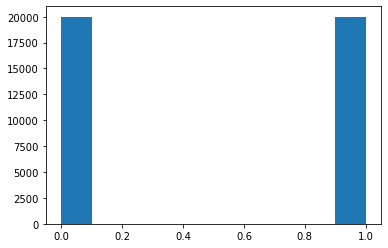

In [11]:
import matplotlib.pyplot as plt
plt.hist(y_train)
plt.show()


In [12]:
X_train_subset = X_train[:500]

In [13]:
y_train_subset = y_train[:500]

In [14]:
X_test_subset = X_train[:500]

In [15]:
y_test_subset = y_train[:500]

In [16]:
X_train_subset_train, X_train_subset_test, y_train_subset_train, y_train_subset_test = train_test_split(X_train_subset, y_train_subset, test_size=0.2, random_state=45)

In [17]:
X_train_subset_train

,review
484,I guess Melville intended this movie to be the...
166,You want the worst horror movie of the 21st ce...
455,It's amazing that actress P.J. Soles didn't be...
63,"Olivier, Kosentsev, Richardson, Coranado, Zeff..."
180,This is 30 minute show about one joke. The jok...
...,...
32,This is a film about 17th Century Italian arti...
380,Vadim changed Brigitte's image and way of life...
131,"What an absolutely stunning movie, if you have..."
414,A somewhat fictionalized biographical portrait...


In [18]:
from sklearn.feature_extraction.text import CountVectorizer

def model_pipe(model, vectorizer, scale=False):
    from sklearn.pipeline import Pipeline

    pipeline= Pipeline([('vectorizer', vectorizer), ('model', model)])
    return pipeline

max_features_limit = 10000
stop_words_language = 'english'
vectorizer = CountVectorizer(max_features=max_features_limit, stop_words=stop_words_language)

                        KNN

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay

param_grid = [{
               'model__n_neighbors': [1, 4, 8, 10, 15],
               'model__weights': ['uniform','distance'],
               'vectorizer__ngram_range': [(1,1), (1,2)],
               'vectorizer__min_df': [0.05, 0.10]}
 ]

pipeline = model_pipe(KNeighborsClassifier(), vectorizer)

In [20]:
knn_results = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring='accuracy', refit=True, cv=5)
knn_results = knn_results.fit(X_train_subset_train['review'], y_train_subset_train.values.ravel())

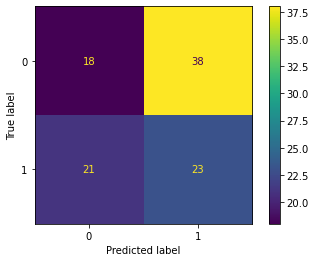

In [21]:
ConfusionMatrixDisplay.from_estimator(knn_results, X_train_subset_test['review'], y_train_subset_test.values.ravel())
plt.show()

In [22]:
knn_results.best_params_

{'model__n_neighbors': 10,
 'model__weights': 'distance',
 'vectorizer__min_df': 0.1,
 'vectorizer__ngram_range': (1, 1)}

In [23]:
 knn_results.score(X_train_subset_train['review'], y_train_subset_train.values.ravel())

1.0

1.0 for training

In [24]:
knn_results.score(X_train_subset_test['review'], y_train_subset_test.values.ravel())

0.41

0.41 for testing

                 NB

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay

param_grid = [{'vectorizer__ngram_range': [(1,1), (1,2)],
               'vectorizer__min_df': [0.01,0.05,]}
 ]

pipeline = model_pipe(BernoulliNB(), vectorizer)

In [26]:
nb_results = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring='accuracy', refit=True, cv=5)
nb_results = nb_results.fit(X_train_subset_train['review'], y_train_subset_train.values.ravel())

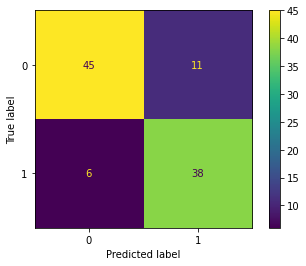

In [27]:
ConfusionMatrixDisplay.from_estimator(nb_results, X_train_subset_test['review'], y_train_subset_test.values.ravel())
plt.show()

In [28]:
nb_results.best_params_

{'vectorizer__min_df': 0.01, 'vectorizer__ngram_range': (1, 2)}

In [29]:
nb_results.score(X_train_subset_train['review'], y_train_subset_train.values.ravel())

0.9825

0.9825 for training

In [30]:
nb_results.score(X_train_subset_test['review'], y_train_subset_test.values.ravel())

0.83

0.8325 for testing

                             SVM

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay

param_grid = [{'vectorizer__ngram_range': [(1,1), (1,2)],
               'vectorizer__min_df': [0.02, 0.05],
               'model__C': [0.1, 1, 5],
               'model__kernel': ['linear', 'rbf'],
               'model__class_weight': [None, 'balanced']}
 ]

pipeline= model_pipe(SVC(), vectorizer)

In [32]:
svm_results = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring='accuracy', refit=True, cv=5)
svm_results = svm_results.fit(X_train_subset_train['review'], y_train_subset_train.values.ravel())

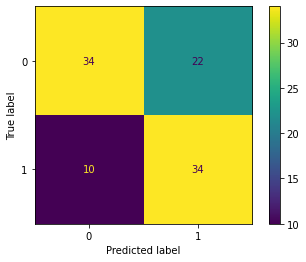

In [33]:
ConfusionMatrixDisplay.from_estimator(svm_results, X_train_subset_test['review'], y_train_subset_test.values.ravel())
plt.show()

In [34]:
svm_results.best_params_

{'model__C': 5,
 'model__class_weight': None,
 'model__kernel': 'rbf',
 'vectorizer__min_df': 0.02,
 'vectorizer__ngram_range': (1, 1)}

In [35]:
svm_results.score(X_train_subset_train['review'], y_train_subset_train.values.ravel())

1.0

1.0 for training

In [37]:
svm_results.score(X_train_subset_test['review'], y_train_subset_test.values.ravel())

0.68

0.68 for testing

                    LR

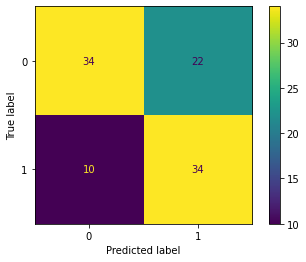

In [42]:
param_grid = [{'vectorizer__ngram_range': [(1,1), (1,2)],
               'vectorizer__min_df': [0.02, 0.05],
               'model__C': [0.1, 1, 5],
               'model__class_weight': [None, 'balanced']}
 ]

pipeline = model_pipe(LogisticRegression(solver='liblinear'), vectorizer)

lr_results = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring='accuracy', refit=True, cv=5)
lr_results = lr_results.fit(X_train_subset_train['review'], y_train_subset_train.values.ravel())

ConfusionMatrixDisplay.from_estimator(lr_results, X_train_subset_test['review'], y_train_subset_test.values.ravel())
plt.show()

In [43]:
lr_results.best_params_

{'model__C': 5,
 'model__class_weight': None,
 'vectorizer__min_df': 0.02,
 'vectorizer__ngram_range': (1, 1)}

In [44]:
lr_results.score(X_train_subset_train['review'], y_train_subset_train.values.ravel())

1.0

1.0 for training

In [46]:
lr_results.score(X_train_subset_test['review'], y_train_subset_test.values.ravel())

0.68

0.68 for testing

                           DT

In [47]:
param_grid = [{
    'vectorizer__ngram_range': [(1, 1), (1, 2)],
    'vectorizer__min_df': [0.05, 0.10],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__class_weight': [None, 'balanced']
}]


pipeline= model_pipe(DecisionTreeClassifier(), vectorizer)

In [49]:
dt_results = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring='accuracy', refit=True, cv=5)
dt_results = dt_results.fit(X_train_subset_train['review'], y_train_subset_train.values.ravel())


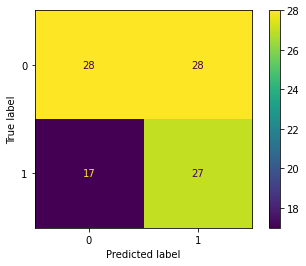

In [50]:
ConfusionMatrixDisplay.from_estimator(dt_results, X_train_subset_test['review'], y_train_subset_test.values.ravel())
plt.show()

In [51]:
dt_results.best_params_

{'model__class_weight': None,
 'model__max_depth': 20,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 2,
 'vectorizer__min_df': 0.05,
 'vectorizer__ngram_range': (1, 2)}

In [52]:
dt_results.score(X_train_subset_train['review'], y_train_subset_train.values.ravel())

0.9875

0.9875 for training

In [53]:
dt_results.score(X_train_subset_test['review'], y_train_subset_test.values.ravel())

0.55

0.55 for testing

based on the scores it seems like Naive Bayes  performed well on provided subset so i would choose this for further execution

In [61]:
best_model_pipeline = Pipeline([
    ('vectorizer', CountVectorizer(min_df=0.01, ngram_range=(1, 2))),
    ('model', BernoulliNB())
])


In [62]:
best_model= best_model_pipeline.fit(X_train_subset['review'], y_train_subset.values.ravel())

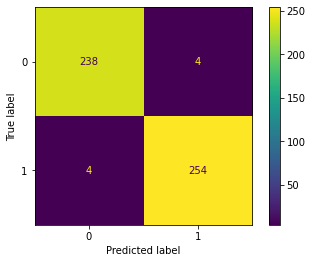

In [63]:
ConfusionMatrixDisplay.from_estimator(best_model, X_test_subset['review'], y_test_subset.values.ravel())
plt.show()

In [64]:
best_model.score(X_train['review'], y_train.values.ravel())

0.80725

In [66]:
best_model.score(X_test['review'], y_test.values.ravel())

0.8069

In [68]:
from sklearn.metrics import classification_report

y_pred = best_model_pipeline.predict(X_test['review'])


In [69]:
print(classification_report(y_test.values.ravel(), y_pred))

              precision    recall  f1-score   support

           0       0.79      0.84      0.81      5000
           1       0.83      0.78      0.80      5000

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.81      0.81      0.81     10000

